In [173]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode




In [174]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")
mls_df.head()

,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
0,2372641,Single Family Residence,Raleigh,27607,5,8,9376,2,2022,2021-03-16,2022-02-23,1850000,324999,344,-1525001,35.8014,-78.6877
1,2410217,Single Family Residence,Whitsett,27377,5,7,6983,8,1883,2021-09-27,2023-01-09,1300000,3240000,469,1940000,36.0330,-79.5972
2,2375877,Single Family Residence,Wake Forest,27587,5,5,7200,7,2005,2021-04-05,2021-05-27,1800000,2900000,52,1100000,35.9815,-78.5392
3,2378933,Single Family Residence,Raleigh,27615,5,7,6289,3,2022,2021-04-20,2022-09-28,2550000,3577591,526,1027591,35.8887,-78.6393
4,2495996,Single Family Residence,Apex,27502,4,6,7266,5,2023,2023-02-21,2023-11-21,1755900,2598548,273,842648,35.7225,-78.8408


In [175]:
# Copy the data frame to a new data frame
condo_df = mls_df.copy()

# Keep only the 'Single Family Residence' values in column 'Property Type'
condo_df = condo_df[condo_df['Property Type'] == 'Condo']

# Drop the 'Property Type' column
condo_df = condo_df.drop(columns=['Property Type'])


condo_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
16,2442914,Chapel Hill,27516,3,2,1782,1,2013,2022-04-16,2022-06-30,1000000,1500000,75,500000,35.9162,-79.0999
27,2437799,Chapel Hill,27516,4,4,3157,1,2013,2022-03-21,2022-04-05,1600000,2000000,15,400000,35.9162,-79.0999
110,2498024,Chapel Hill,27516,3,3,2183,1,2013,2023-03-05,2023-03-24,1400000,1650000,19,250000,35.9162,-79.0999
382,2444529,Chapel Hill,27516,2,2,1128,5,2013,2022-04-25,2022-05-24,589900,755000,29,165100,35.9162,-79.0999
1101,2443429,Raleigh,27612,2,2,1745,1,2006,2022-04-19,2022-04-29,450000,565000,10,115000,35.8520,-78.6841


In [176]:
condo_df['City'].value_counts()

City
Raleigh                2021
Chapel Hill             646
Durham                  430
Cary                    328
Burlington               99
Carrboro                 58
Morrisville              55
Fayetteville             43
Wake Forest              36
Greensboro               29
Clayton                  29
Apex                     26
Gibsonville              24
Fuquay Varina            20
Saxapahaw                19
Holly Springs            14
Hillsborough             12
Benson                   12
Elon                     11
Pittsboro                10
Mebane                    9
Garner                    9
Graham                    8
Atlantic Beach            7
Clarksville               6
Carolina Beach            6
Wilson                    4
Sanford                   4
Greenville                4
Charlotte                 4
Winston Salem             3
Whitsett                  2
Kernersville              2
Morehead City             2
Wilmington                2
Goldsboro      

In [177]:
#Remove all rows corresponding to cities with less than 8 listings
condo_df = condo_df[condo_df['City'].map(condo_df['City'].value_counts()) > 7]
condo_df['City'].value_counts()

City
Raleigh          2021
Chapel Hill       646
Durham            430
Cary              328
Burlington         99
Carrboro           58
Morrisville        55
Fayetteville       43
Wake Forest        36
Clayton            29
Greensboro         29
Apex               26
Gibsonville        24
Fuquay Varina      20
Saxapahaw          19
Holly Springs      14
Hillsborough       12
Benson             12
Elon               11
Pittsboro          10
Mebane              9
Garner              9
Graham              8
Name: count, dtype: int64

In [178]:
condo_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,3948.000000,3948.000000,3948.000000,3948.000000,3948.00000,3948.000000,3.948000e+03,3.948000e+03,3948.000000,3948.000000,3948.000000,3948.000000
mean,27580.205420,2.111196,2.139311,1210.187690,1.04306,1999.050152,3.167177e+05,3.189851e+05,90.319402,2267.356890,35.846588,-78.817174
std,123.639589,0.739453,0.796715,546.626296,0.38881,408.200796,2.073413e+05,2.059113e+05,163.403009,20887.539864,0.132377,0.232604
min,27215.000000,0.000000,1.000000,-19996.000000,1.00000,1854.000000,4.500000e+04,4.950000e+04,0.000000,-200000.000000,35.025700,-79.908600
25%,27517.000000,2.000000,2.000000,939.000000,1.00000,1984.000000,1.967500e+05,2.000000e+05,33.000000,-5000.000000,35.772700,-78.947800
50%,27604.000000,2.000000,2.000000,1147.000000,1.00000,1998.000000,2.650000e+05,2.682500e+05,45.000000,0.000000,35.852000,-78.744700
75%,27613.000000,3.000000,3.000000,1404.250000,1.00000,2006.000000,3.750000e+05,3.750000e+05,72.000000,9924.750000,35.918200,-78.653000
max,28365.000000,5.000000,7.000000,4532.000000,8.00000,27606.000000,2.600000e+06,2.600000e+06,1478.000000,500000.000000,36.156600,-78.098300


In [179]:
condo_df = condo_df[condo_df['SqFt'] > 100]
condo_df = condo_df[condo_df['Bedrooms'] > 0]
condo_df = condo_df[condo_df['Total Baths'] > 0]
condo_df = condo_df[condo_df['Year Built'] <= 2024]
condo_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3.938000e+03,3.938000e+03,3938.000000,3938.000000,3938.000000,3938.000000
mean,27580.116557,2.115033,2.141696,1217.242255,1.042915,1992.544439,3.169953e+05,3.192828e+05,89.813865,2287.503301,35.846326,-78.816771
std,123.681255,0.735004,0.795743,428.920502,0.388999,21.339585,2.075015e+05,2.060624e+05,162.106696,20904.976463,0.132369,0.232142
min,27215.000000,1.000000,1.000000,317.000000,1.000000,1854.000000,4.500000e+04,4.950000e+04,0.000000,-200000.000000,35.025700,-79.908600
25%,27517.000000,2.000000,2.000000,940.000000,1.000000,1984.000000,1.975000e+05,2.000000e+05,33.000000,-5000.000000,35.772700,-78.947800
50%,27604.000000,2.000000,2.000000,1148.000000,1.000000,1998.000000,2.650000e+05,2.690000e+05,45.000000,0.000000,35.852000,-78.744700
75%,27613.000000,3.000000,3.000000,1405.000000,1.000000,2006.000000,3.750000e+05,3.750000e+05,72.000000,10000.000000,35.918200,-78.653000
max,28365.000000,5.000000,7.000000,4532.000000,8.000000,2024.000000,2.600000e+06,2.600000e+06,1478.000000,500000.000000,36.156600,-78.098300


In [180]:
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3938 entries, 16 to 141162
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MLS #           3938 non-null   object 
 1   City            3938 non-null   object 
 2   Zip             3938 non-null   int64  
 3   Bedrooms        3938 non-null   int64  
 4   Total Baths     3938 non-null   int64  
 5   SqFt            3938 non-null   int64  
 6   Acres           3938 non-null   int64  
 7   Year Built      3938 non-null   int64  
 8   List Date       3938 non-null   object 
 9   Closing Date    3938 non-null   object 
 10  List Price      3938 non-null   int64  
 11  Sold Price      3938 non-null   int64  
 12  Days on Market  3938 non-null   int64  
 13  Over Asking     3938 non-null   int64  
 14  Lat             3938 non-null   float64
 15  Lon             3938 non-null   float64
dtypes: float64(2), int64(10), object(4)
memory usage: 523.0+ KB


In [181]:
#Create a copy of the data frame and drop the non-numeric columns
condo_nostr_df = condo_df.copy()
condo_nostr_df = condo_nostr_df.drop(columns=['City'])
condo_nostr_df = condo_nostr_df.drop(columns=['List Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['Closing Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['MLS #'])

#Create a correlation matrix
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.994914
SqFt              0.617797
Year Built        0.319532
Total Baths       0.308747
Days on Market    0.266986
Bedrooms          0.197030
Lon               0.093571
Lat               0.034427
Acres             0.032234
Zip               0.030548
Over Asking      -0.018355
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

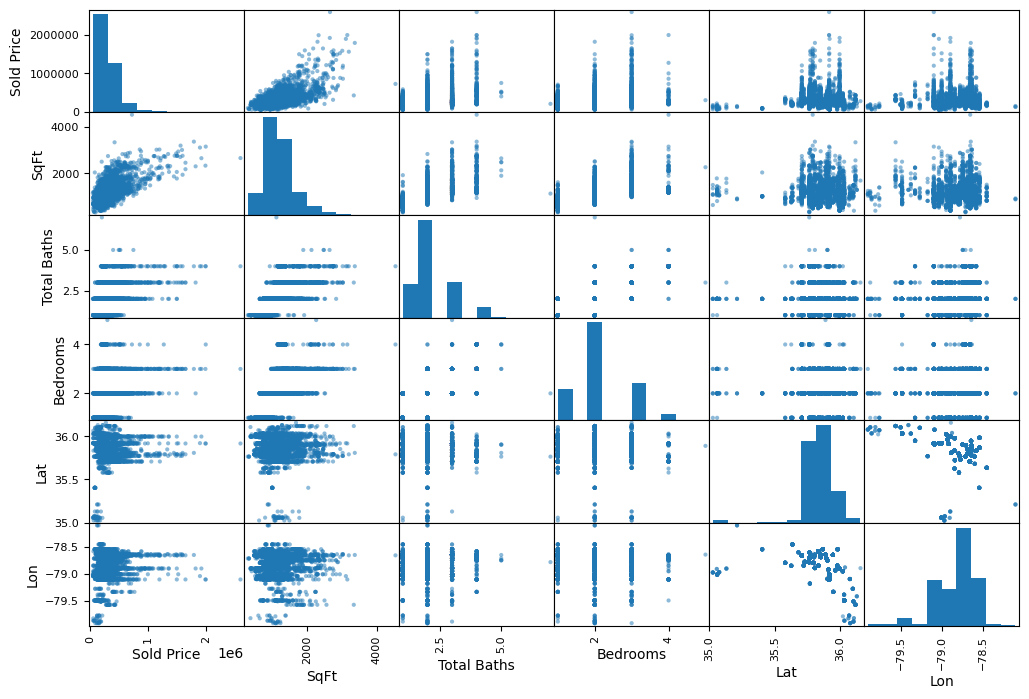

In [182]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(condo_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

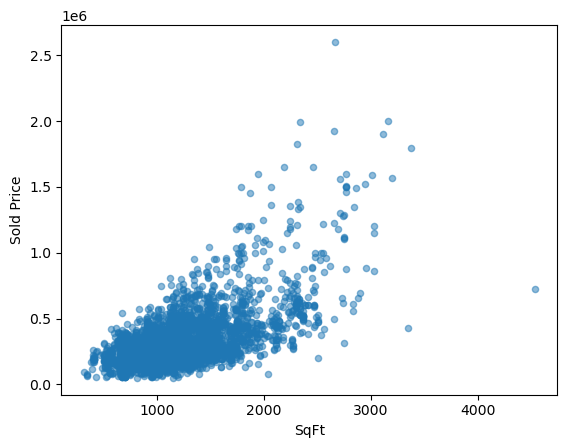

In [183]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
condo_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [184]:
#Create a new column for the price per square foot
condo_nostr_df['Price per SqFt'] = condo_nostr_df['Sold Price'] / condo_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.994914
Price per SqFt    0.706244
SqFt              0.617797
Year Built        0.319532
Total Baths       0.308747
Days on Market    0.266986
Bedrooms          0.197030
Lon               0.093571
Lat               0.034427
Acres             0.032234
Zip               0.030548
Over Asking      -0.018355
Name: Sold Price, dtype: float64

In [185]:
#Check the orginal data frame to see how many cities are in the data
len(condo_df['City'].value_counts())

23

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



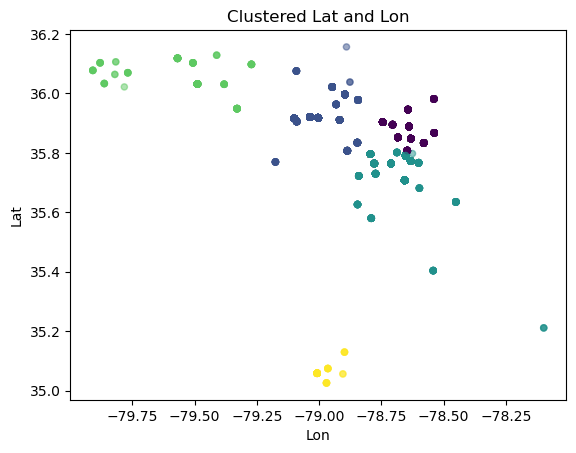

In [186]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
condo_df['Cluster'] = KMeans(n_clusters=5).fit_predict(condo_df[['Lat', 'Lon']])
condo_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('condos_clustered.png')


In [187]:
#Create a variable for the top 373 cities (effectively all cities) with the highest average sold price
top373 = condo_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 373 (all) cities with the highest average sold price
fig = px.bar(top373, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [188]:
top373 = condo_df.groupby('City')['Total Baths'].mean().nlargest(373).reset_index()

fig = px.bar(top373, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [189]:
df_mean = condo_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [190]:
fig = px.scatter(condo_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

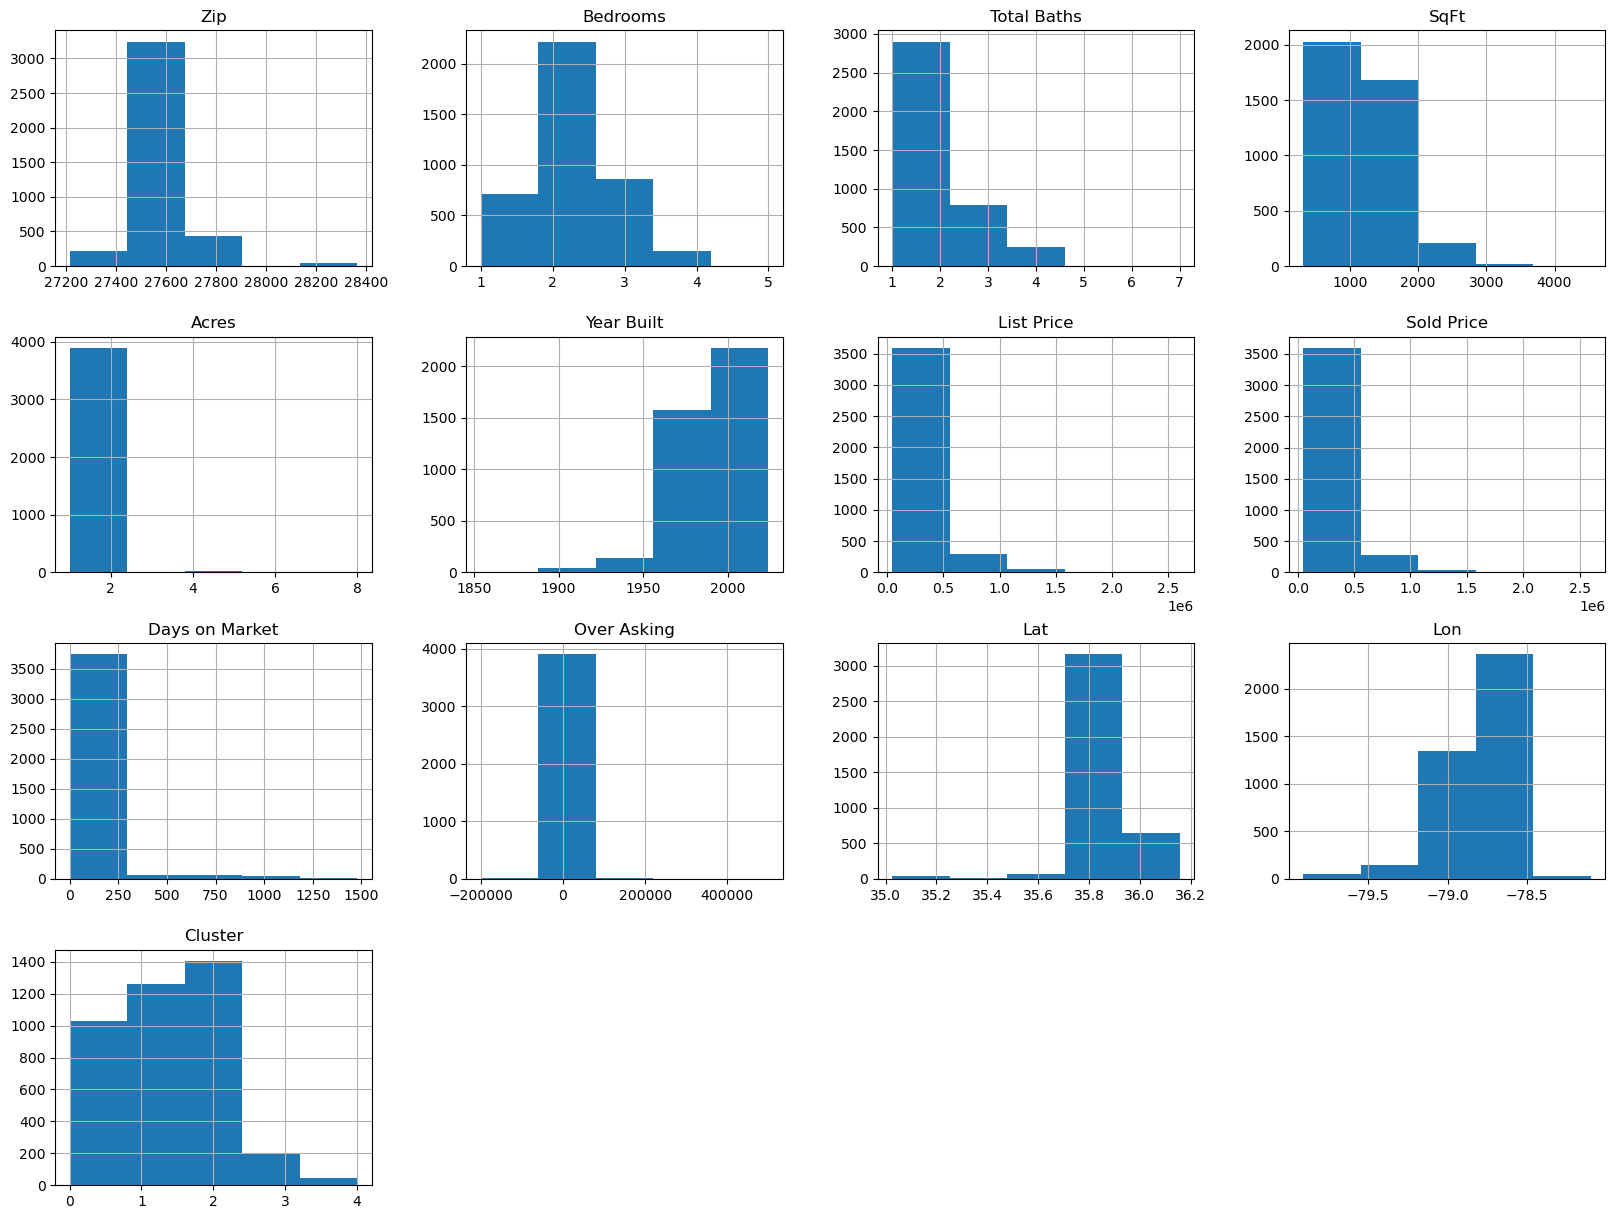

In [191]:
condo_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [192]:
condo_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
16,2442914,Chapel Hill,27516,3,2,1782,1,2013,2022-04-16,2022-06-30,1000000,1500000,75,500000,35.9162,-79.0999,1
27,2437799,Chapel Hill,27516,4,4,3157,1,2013,2022-03-21,2022-04-05,1600000,2000000,15,400000,35.9162,-79.0999,1
110,2498024,Chapel Hill,27516,3,3,2183,1,2013,2023-03-05,2023-03-24,1400000,1650000,19,250000,35.9162,-79.0999,1
382,2444529,Chapel Hill,27516,2,2,1128,5,2013,2022-04-25,2022-05-24,589900,755000,29,165100,35.9162,-79.0999,1
1101,2443429,Raleigh,27612,2,2,1745,1,2006,2022-04-19,2022-04-29,450000,565000,10,115000,35.8520,-78.6841,0


In [193]:
# Variable with the Longitude and Latitude
X=condo_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
16,2442914,35.9162,-79.0999
27,2437799,35.9162,-79.0999
110,2498024,35.9162,-79.0999
382,2444529,35.9162,-79.0999
1101,2443429,35.8520,-78.6841
1158,2350639,35.7908,-78.6530
1398,2436618,35.7076,-78.6563
1493,2527450,35.8520,-78.6841
1833,2499800,35.9182,-79.0035
1967,2447994,35.7225,-78.8408


c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.

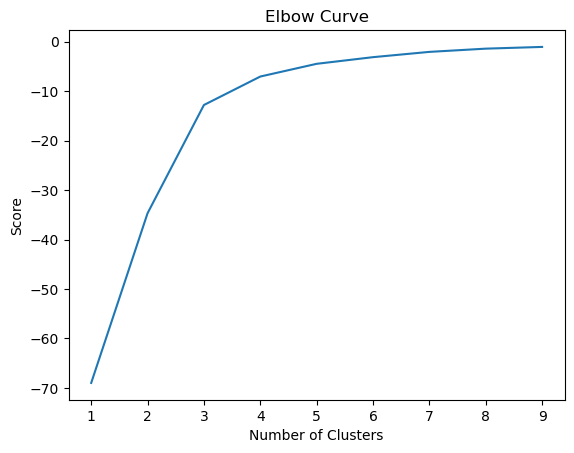

In [194]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = condo_df[['Lat']]
X_axis = condo_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [195]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,MLS #,Lat,Lon,cluster_label
16,2442914,35.9162,-79.0999,1
27,2437799,35.9162,-79.0999,1
110,2498024,35.9162,-79.0999,1
382,2444529,35.9162,-79.0999,1
1101,2443429,35.8520,-78.6841,0
1158,2350639,35.7908,-78.6530,0
1398,2436618,35.7076,-78.6563,0
1493,2527450,35.8520,-78.6841,0
1833,2499800,35.9182,-79.0035,1
1967,2447994,35.7225,-78.8408,0


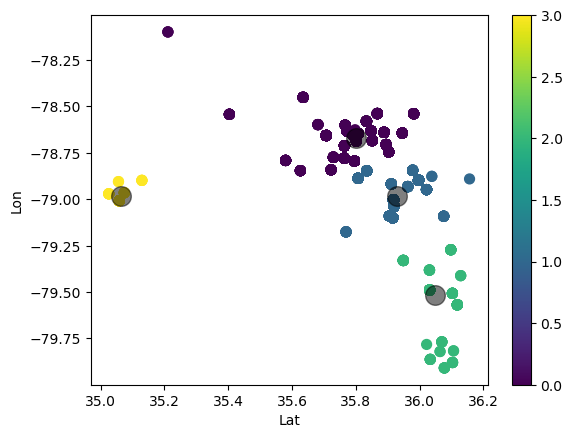

In [196]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

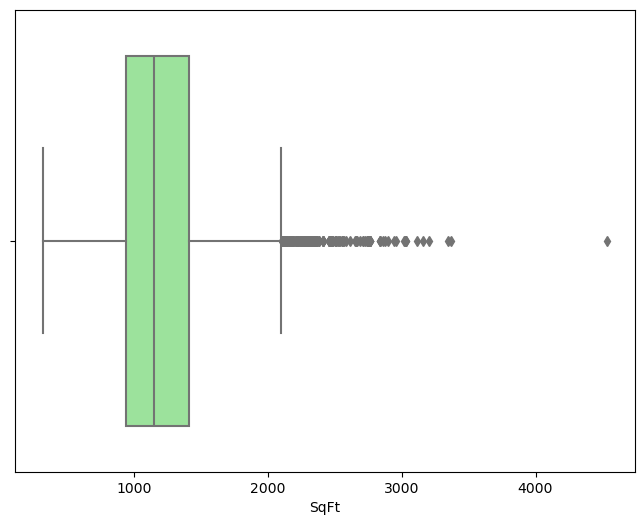

In [197]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

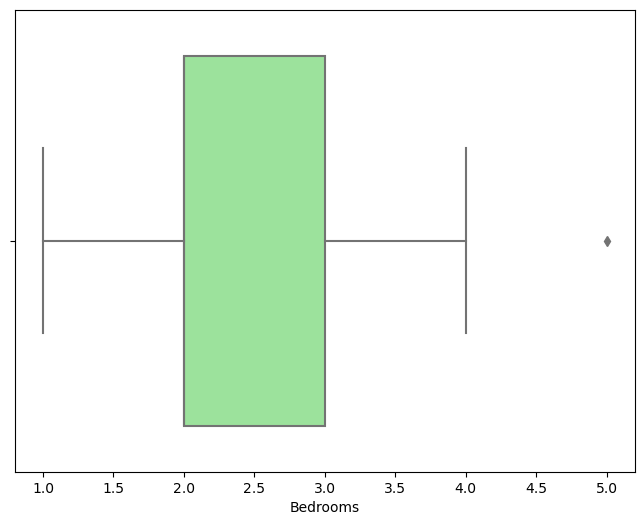

In [198]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

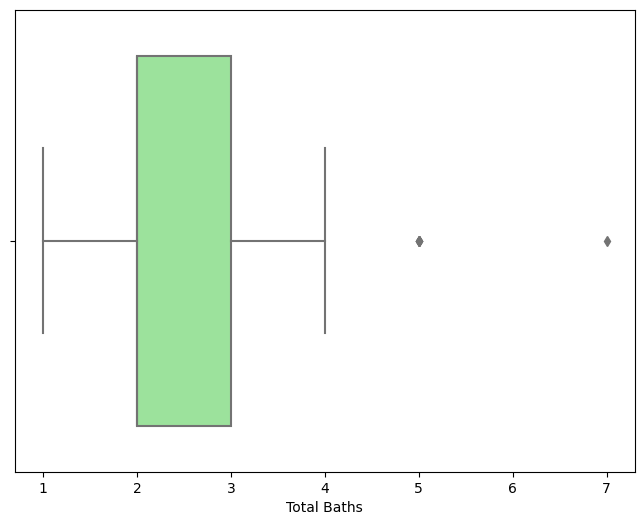

In [199]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

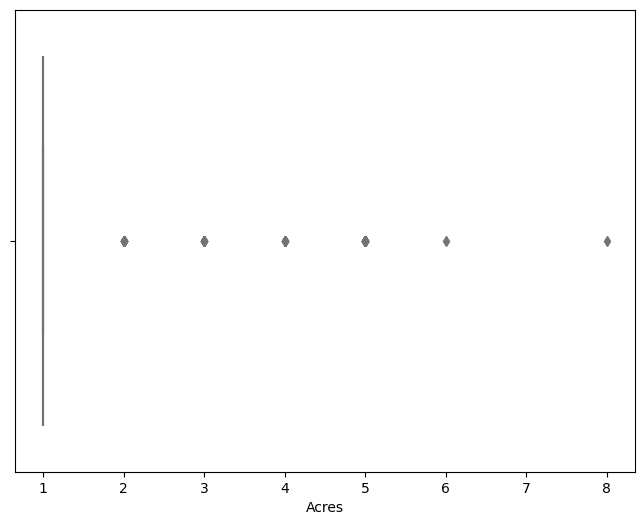

In [200]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

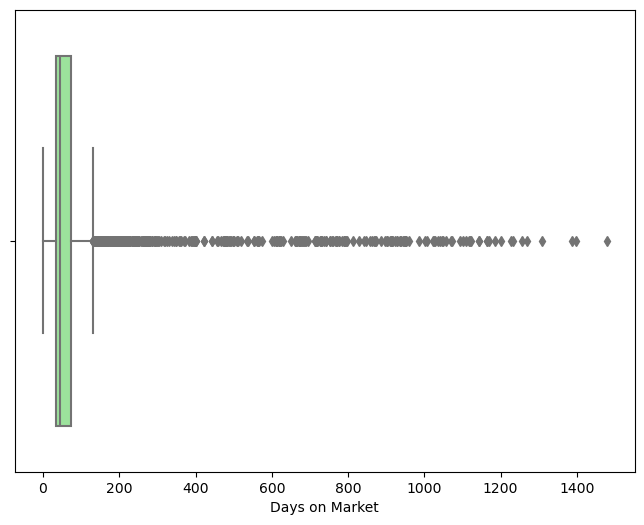

In [201]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

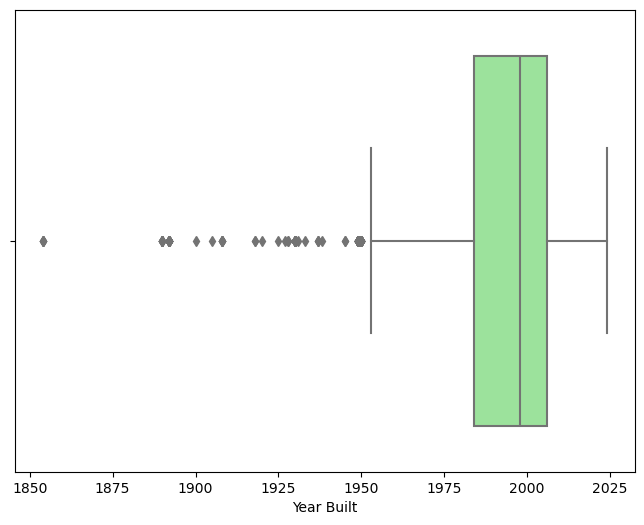

In [202]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Year Built'], color='lightgreen')

In [203]:
condo_df.sort_values('Year Built', ascending=True)

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
35515,2430251,Wake Forest,27587,2,3,965,1,1854,2022-02-07,2022-04-21,300000,311000,73,11000,35.9815,-78.5392,0
89016,2362406,Wake Forest,27587,3,2,1205,1,1854,2021-01-18,2021-02-25,285000,285000,38,0,35.9815,-78.5392,0
76816,2542065,Wake Forest,27587,2,3,876,1,1854,2023-11-15,2023-12-08,325000,325000,23,0,35.9815,-78.5392,0
59446,2532212,Wake Forest,27587,1,1,700,1,1854,2023-09-14,2023-10-05,299900,300000,21,100,35.9815,-78.5392,0
18714,2408616,Wake Forest,27587,1,1,648,1,1854,2021-09-17,2021-10-29,225000,251500,42,26500,35.9815,-78.5392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72923,2534465,Durham,27701,2,2,1642,1,2023,2021-08-18,2023-09-25,896125,896125,768,0,35.9967,-78.8966,1
118523,2463504,Raleigh,27606,2,3,1371,1,2024,2022-07-20,2024-04-02,460000,450000,622,-10000,35.7645,-78.7112,2
61384,10006495,Wake Forest,27587,3,3,2410,1,2024,2024-01-16,2024-04-04,380000,380000,79,0,35.9815,-78.5392,0
20168,10025965,Fuquay Varina,27526,1,1,681,5,2024,2024-04-29,2024-06-06,225000,250000,38,25000,35.5800,-78.7908,2


In [204]:
condo_df.sort_values('Year Built', ascending=False)

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
62152,10029316,Fuquay Varina,27526,2,2,1070,1,2024,2024-05-15,2024-05-15,380900,380900,0,0,35.5800,-78.7908,2
20168,10025965,Fuquay Varina,27526,1,1,681,5,2024,2024-04-29,2024-06-06,225000,250000,38,25000,35.5800,-78.7908,2
61384,10006495,Wake Forest,27587,3,3,2410,1,2024,2024-01-16,2024-04-04,380000,380000,79,0,35.9815,-78.5392,0
118523,2463504,Raleigh,27606,2,3,1371,1,2024,2022-07-20,2024-04-02,460000,450000,622,-10000,35.7645,-78.7112,2
92867,2540996,Durham,27701,2,2,1642,1,2023,2021-08-31,2023-11-02,860625,860625,793,0,35.9967,-78.8966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35515,2430251,Wake Forest,27587,2,3,965,1,1854,2022-02-07,2022-04-21,300000,311000,73,11000,35.9815,-78.5392,0
76816,2542065,Wake Forest,27587,2,3,876,1,1854,2023-11-15,2023-12-08,325000,325000,23,0,35.9815,-78.5392,0
89016,2362406,Wake Forest,27587,3,2,1205,1,1854,2021-01-18,2021-02-25,285000,285000,38,0,35.9815,-78.5392,0
18714,2408616,Wake Forest,27587,1,1,648,1,1854,2021-09-17,2021-10-29,225000,251500,42,26500,35.9815,-78.5392,0


In [206]:
# Save the DataFrame to a CSV file
condo_df.to_csv('Clean_Data/mls_condo_cleaned.csv', index=False)